
--- K-Means 구현 테스트 ---
[K-Means] 9회 반복 후 중심점 수렴.


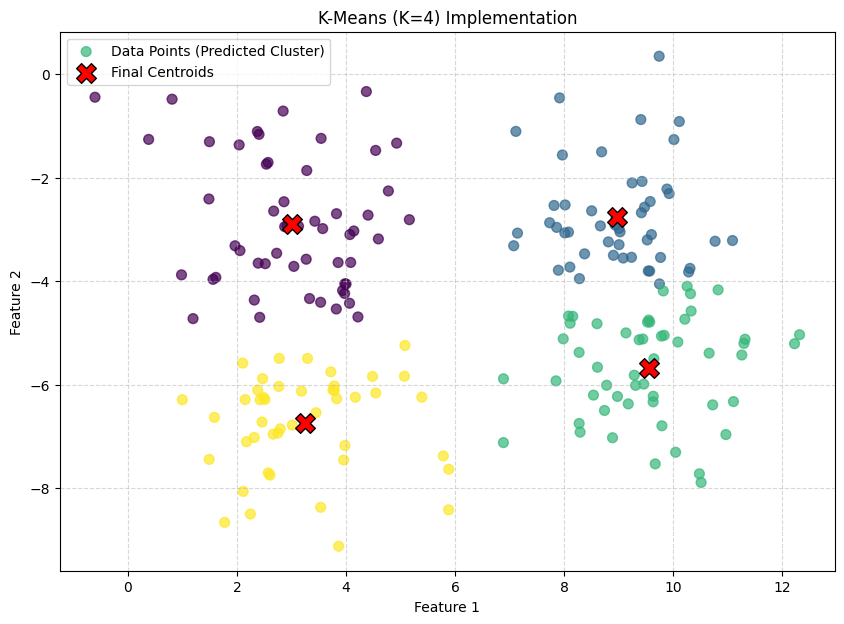

In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    """ K-Means 군집화 알고리즘 """

    def __init__(self, n_clusters=2, max_iter=100, random_state=42):
        """
        n_clusters: 군집 수 (K)
        max_iter: 최대 반복 횟수
        random_state: 재현성을 위한 시드
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None # 각 군집의 중심점

    def fit_predict(self, X):
        """
        데이터 X를 n_clusters 개의 군집으로 분류하고 레이블을 반환합니다.
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # 1. 초기 중심점 랜덤 선택 (데이터 중에서)
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        labels = np.zeros(n_samples)

        # 2. 할당/업데이트 반복
        for i in range(self.max_iter):
            # 3. [할당 단계]
            labels = self._assign_clusters(X)

            # 이전 중심점 저장
            old_centroids = self.centroids.copy()

            # 4. [업데이트 단계]
            self.centroids = self._update_centroids(X, labels)

            # 5. [종료 조건] 중심점에 변화가 없으면 중단
            if np.all(old_centroids == self.centroids):
                print(f"[K-Means] {i+1}회 반복 후 중심점 수렴.")
                break

        return labels.astype(int)

    def _assign_clusters(self, X):
        """ 모든 데이터를 가장 가까운 중심점에 할당 (레이블 반환) """
        labels = np.zeros(X.shape[0])
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            labels[i] = np.argmin(distances)
        return labels

    def _update_centroids(self, X, labels):
        """ 각 군집의 평균으로 새 중심점 계산 """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # 군집에 할당된 점이 없으면 (드문 경우) 기존 중심 유지
                new_centroids[k] = self.centroids[k]
        return new_centroids

# --- 사용 예제 (시각화) ---
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_blobs

    print("\n--- K-Means 구현 테스트 ---")

    # 1. 데이터 생성
    K = 4
    X, y_true = make_blobs(n_samples=200, centers=K, n_features=2,
                           random_state=30, cluster_std=1.2)

    # 2. 모델 생성 및 군집화
    kmeans = KMeans(n_clusters=K, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # 3. 시각화
    plt.figure(figsize=(10, 7))
    plt.title(f"K-Means (K={K}) Implementation")

    # 예측된 군집 결과
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', alpha=0.7,
                label='Data Points (Predicted Cluster)')

    # 최종 중심점
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red',
                marker='X', s=200, edgecolors='k', label='Final Centroids')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()